# **Time series Forecating With ARIMA**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# **Reading the data**

In [2]:
df=pd.read_csv('delhi_monthly_all.csv',parse_dates=['Date'],index_col=['Date'])

In [3]:
df.head()

,City,PM2_5,PM10,NO,NO2,NOx,CO,SO2,O3,NH3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,,,
2015-01-31,Delhi,175.690645,276.9713,29.39258,36.92548,51.79419,10.269350,5.472333,25.34167,98.16032,5.265161,10.913550,3.730323,342.290323
2015-02-28,Delhi,153.920357,234.9396,29.28786,41.65679,54.20857,11.137860,7.863214,30.82964,65.78571,3.969286,9.411429,6.012857,327.928571
2015-03-31,Delhi,80.338065,135.0445,15.01000,24.38613,30.73419,9.863871,7.387097,28.73839,27.79032,3.066452,8.617097,5.897333,256.064516
2015-04-30,Delhi,91.562333,187.9913,18.51067,44.27967,54.75100,7.218333,16.101330,58.17200,32.27586,3.143333,9.826667,2.949667,305.266667
2015-05-31,Delhi,97.109355,271.0506,30.83387,61.48355,78.62806,8.008387,16.129030,69.06161,38.92290,3.119667,10.062580,2.210000,348.580645


In [4]:
df=df['PM2_5']
df.tail(10)

Date
2019-09-30     40.132667
2019-10-31    123.657097
2019-11-30    205.393667
2019-12-31    205.241613
2020-01-31    157.112581
2020-02-29    121.484138
2020-03-31     57.506452
2020-04-30     44.940000
2020-05-31     55.448710
2020-06-30     46.694667
Name: PM2_5, dtype: float64

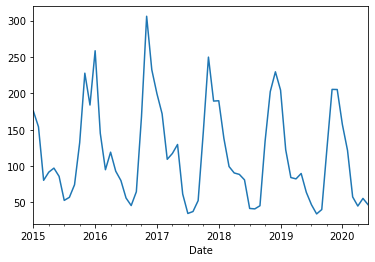

In [5]:
df.plot()

In [6]:
df=df.dropna()

In [7]:
# pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


# **Stationarity check**

In [8]:
import statsmodels.api as sm

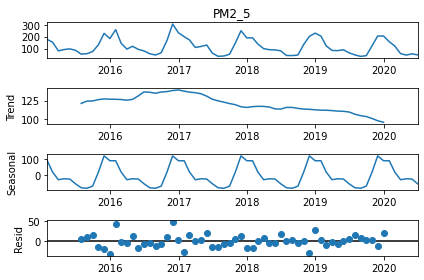

In [9]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

#**Adfuller test**

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adftest = adfuller(df)

In [12]:
print('pvalue of adfuller test is: ',adftest[1])

pvalue of adfuller test is:  0.981295253493104


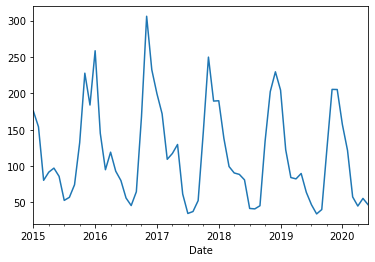

In [13]:
df.plot()

# **Making dataset stationary**

In [14]:
df_stationary =df.diff().dropna()

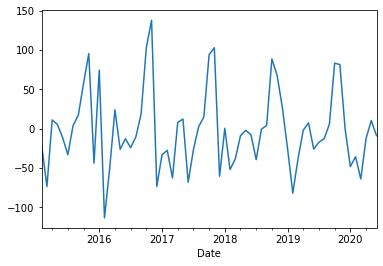

In [15]:
df_stationary.plot()

In [16]:
adftest = adfuller(df_stationary)
print('pvalue of adfuller test is: ',adftest[1])

pvalue of adfuller test is:  1.9887942336001097e-11


# **Train test split**

In [17]:
len(df_stationary)

65

In [18]:
train=df_stationary[:49]
test=df_stationary[49:59]

# **Hyperparameters of ARIMA model- p d q**

In [19]:
import itertools

In [20]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [21]:
pdq_combination=list(itertools.product(p,d,q))

In [22]:
len(pdq_combination)

128

In [23]:
rmse=[]
order1=[]

In [24]:
for pdq in pdq_combination:
      try:
        model=ARIMA(train,order=pdq).fit() 
        pred=model.predict(start=len(train),end=(len(df)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
      except:
        continue

    

In [25]:
print(rmse)

[]


In [26]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [27]:
results.head()

,RMSE


In [28]:
results.to_csv('ARIMA_result.csv')

# **Building the model**

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
model= ARIMA(train,order=(6,0,2)).fit()

C:\Users\skati\Miniconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\skati\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M w

# **Pridict test dataset**

In [62]:
#test data
pred=model.predict(start=len(train),end=(len(df_stationary)-7))
# print(pred)
print(len(train),len(df_stationary)-7)

49 58


In [63]:
#train
predfortrain=model.predict(0,end=len(train)-1)
# print(predfortrain)

In [64]:
pred1=model.predict(0,len(df_stationary)-1)

In [65]:
pred.head()

2019-03-31   -42.026194
2019-04-30    -3.315660
2019-05-31    19.514918
2019-06-30     3.339802
2019-07-31   -24.754729
Freq: M, dtype: float64

# **Model Evaluation**

In [73]:
from sklearn.metrics import mean_squared_error,r2_score

In [74]:
errorfortrain=np.sqrt(mean_squared_error(train,predfortrain))
errorfortrain

41.95435102297773

In [75]:
errorfortest=np.sqrt(mean_squared_error(test,pred))
errorfortest

17.188777939195212

In [77]:
trainscore = r2_score(train,predfortrain)
testscore = r2_score(test,pred)
print(trainscore,testscore)

0.3919223405601371 0.81114007963271


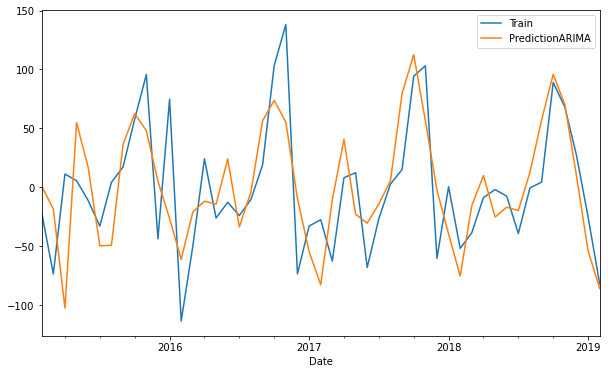

In [69]:
train.plot(legend=True, label='Train', figsize=(10,6))
# test.plot(legend=True, label='Test')
predfortrain.plot(legend=True, label='PredictionARIMA')

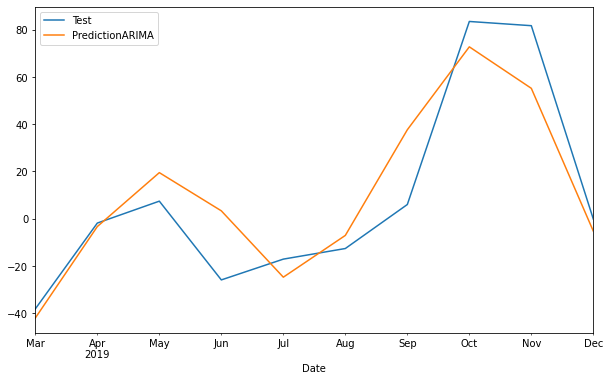

In [70]:
test.plot(legend=True, label='Test', figsize=(10,6))
# test.plot(legend=True, label='Test')
pred.plot(legend=True, label='PredictionARIMA')